In [27]:
using INMET, DataFrames, Dates, Plots

In [2]:
ENV["INMET_TOKEN"] = "M3pnYzV0SEUxYmFCY1pURkpEa2FMUnRPUTBKSTFxUzQ=3zgc5tHE1baBcZTFJDkaLRtOQ0JI1qS4"

"M3pnYzV0SEUxYmFCY1pURkpEa2FMUnRPUTBKSTFxUzQ=3zgc5tHE1baBcZTFJDkaLRtOQ0JI1qS4"

In [3]:
df = INMET.stations()

Row,TP_ESTACAO,CD_ESTACAO,SG_ESTADO,CD_SITUACAO,CD_DISTRITO,CD_OSCAR,DT_FIM_OPERACAO,CD_WSI,SG_ENTIDADE,DT_INICIO_OPERACAO,DC_NOME,FL_CAPITAL,VL_LONGITUDE,VL_LATITUDE,VL_ALTITUDE
,String,String,String,String,String,String?,Missing,String?,String,String,String,String?,Quantity…,Quantity…,Quantity…
1,Automatica,A422,BA,Pane,04,0-2000-0-86765,missing,0-76-0-2906907000000408,INMET,2008-07-20T21:00:00.000-03:00,ABROLHOS,N,-38.7033°,-17.9631°,20.93 m
2,Automatica,A360,CE,Pane,03,0-2000-0-81755,missing,0-76-0-2300200000000446,INMET,2009-04-21T21:00:00.000-03:00,ACARAU,N,-40.0872°,-3.12111°,67.15 m
3,Automatica,A657,ES,Operante,06,0-2000-0-86827,missing,0-76-0-3200102000000478,INMET,2011-09-23T21:00:00.000-03:00,AFONSO CLAUDIO,missing,-41.1069°,-20.1042°,507.48 m
4,Automatica,A908,MT,Operante,09,0-2000-0-86686,missing,0-76-0-5100201000000157,INMET,2006-12-15T21:00:00.000-03:00,AGUA BOA,N,-52.2117°,-14.0164°,440.0 m
5,Automatica,A756,MS,Operante,07,0-2000-0-86812,missing,0-76-0-5000203000000463,INMET,2010-08-13T21:00:00.000-03:00,AGUA CLARA,N,-52.8758°,-20.4444°,323.63 m
6,Automatica,A045,DF,Operante,10,0-2000-0-86716,missing,0-76-0-5300108000000435,INMET,2008-10-02T21:00:00.000-03:00,AGUAS EMENDADAS,missing,-47.6258°,-15.5965°,1030.36 m
7,Automatica,A549,MG,Operante,05,0-2000-0-86722,missing,0-76-0-3101003000000252,INMET,2007-09-08T21:00:00.000-03:00,AGUAS VERMELHAS,N,-41.4578°,-15.7517°,754.07 m
8,Automatica,A534,MG,Operante,05,0-2000-0-86803,missing,0-76-0-3101102000000239,INMET,2007-08-04T21:00:00.000-03:00,AIMORES,N,-41.0908°,-19.5328°,301.0 m
9,Automatica,A617,ES,Operante,06,0-2000-0-86828,missing,0-76-0-3200201000000125,INMET,2006-10-24T21:00:00.000-03:00,ALEGRE,N,-41.4889°,-20.7506°,138.0 m


In [4]:
names(df)

15-element Vector{String}:
 "TP_ESTACAO"
 "CD_ESTACAO"
 "SG_ESTADO"
 "CD_SITUACAO"
 "CD_DISTRITO"
 "CD_OSCAR"
 "DT_FIM_OPERACAO"
 "CD_WSI"
 "SG_ENTIDADE"
 "DT_INICIO_OPERACAO"
 "DC_NOME"
 "FL_CAPITAL"
 "VL_LONGITUDE"
 "VL_LATITUDE"
 "VL_ALTITUDE"

In [5]:
# Verificar todas as linhas da coluna 'A'
df[!, "DC_NOME"]  # ou df[!, :A]

565-element Vector{String}:
 "ABROLHOS"
 "ACARAU"
 "AFONSO CLAUDIO"
 "AGUA BOA"
 "AGUA CLARA"
 "AGUAS EMENDADAS"
 "AGUAS VERMELHAS"
 "AIMORES"
 "ALEGRE"
 "ALEGRETE"
 ⋮
 "VICOSA"
 "VILA BELA DA SANTISSIMA TRINDADE"
 "VILA VELHA"
 "VILHENA"
 "VITORIA"
 "VITORIA DA CONQUISTA"
 "XANXERE"
 "XINGUARA"
 "ZE DOCA"

In [6]:
# Valor para procurar na coluna 'Nome'
station = "PETROLINA"

"PETROLINA"

In [7]:
# Verificar se o valor existe na coluna 'DC_NOME'
if any(df.DC_NOME .== station)
    # Encontrar o valor correspondente na coluna 'CD_ESTACAO'
    valor_correspondente = df[df.DC_NOME .== station, :CD_ESTACAO][1]
    println("A estação correspondente a $station é: ", valor_correspondente)
else
    println("Valor não encontrado na coluna 'DC_NOME'.")
end

A estação correspondente a PETROLINA é: A307


In [18]:
df = INMET.series(:A307, Date(2020,1,1), Date(2020,12,31))

Row,CD_ESTACAO,UF,VEL_VENTO_MED,DC_NOME,DT_MEDICAO,VL_LONGITUDE,VL_LATITUDE,TEMP_MIN,TEMP_MED,TEMP_MAX,UMID_MIN,UMID_MED,CHUVA
,String,String,String,String,String,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…
1,A307,PE,1.4,PETROLINA,2020-01-01,-40.5233°,-9.38833°,21.5 °C,25.9 °C,31.0 °C,45.0 %,68.9 %,10.6 mm
2,A307,PE,2,PETROLINA,2020-01-02,-40.5233°,-9.38833°,24.6 °C,27.9 °C,34.0 °C,34.0 %,60.0 %,0.0 mm
3,A307,PE,1.7,PETROLINA,2020-01-03,-40.5233°,-9.38833°,23.7 °C,26.5 °C,30.3 °C,51.0 %,70.8 %,6.4 mm
4,A307,PE,1.6,PETROLINA,2020-01-04,-40.5233°,-9.38833°,24.8 °C,26.7 °C,29.8 °C,53.0 %,66.2 %,0.0 mm
5,A307,PE,2,PETROLINA,2020-01-05,-40.5233°,-9.38833°,21.5 °C,26.1 °C,31.8 °C,37.0 %,66.3 %,0.8 mm
6,A307,PE,2.6,PETROLINA,2020-01-06,-40.5233°,-9.38833°,24.7 °C,29.1 °C,35.0 °C,32.0 %,55.7 %,0.0 mm
7,A307,PE,1.6,PETROLINA,2020-01-07,-40.5233°,-9.38833°,21.9 °C,27.5 °C,33.8 °C,37.0 %,65.8 %,43.4 mm
8,A307,PE,2.3,PETROLINA,2020-01-08,-40.5233°,-9.38833°,25.1 °C,28.8 °C,34.0 °C,35.0 %,56.6 %,0.0 mm
9,A307,PE,2.2,PETROLINA,2020-01-09,-40.5233°,-9.38833°,23.6 °C,28.6 °C,34.4 °C,30.0 %,53.4 %,0.0 mm


In [21]:
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,CD_ESTACAO,,A307,,A307,0,String
2,UF,,PE,,PE,0,String
3,VEL_VENTO_MED,,1.1,,5.2,0,String
4,DC_NOME,,PETROLINA,,PETROLINA,0,String
5,DT_MEDICAO,,2020-01-01,,2020-12-31,0,String
6,VL_LONGITUDE,-40.5233°,-40.5233°,-40.5233°,-40.5233°,0,"Quantity{Float64, NoDims, FreeUnits{(°,), NoDims, nothing}}"
7,VL_LATITUDE,-9.38833°,-9.38833°,-9.38833°,-9.38833°,0,"Quantity{Float64, NoDims, FreeUnits{(°,), NoDims, nothing}}"
8,TEMP_MIN,,17.8 °C,295.45 K,26.9 °C,0,"Quantity{Float64, 𝚯, FreeUnits{(K,), 𝚯, Affine{-5463//20}}}"
9,TEMP_MED,,22.1 °C,300.05 K,31.9 °C,0,"Quantity{Float64, 𝚯, FreeUnits{(K,), 𝚯, Affine{-5463//20}}}"


In [25]:
df.DT_MEDICAO = Date.(df.DT_MEDICAO, "yyyy-mm-dd")

366-element Vector{Date}:
 2020-01-01
 2020-01-02
 2020-01-03
 2020-01-04
 2020-01-05
 2020-01-06
 2020-01-07
 2020-01-08
 2020-01-09
 2020-01-10
 ⋮
 2020-12-23
 2020-12-24
 2020-12-25
 2020-12-26
 2020-12-27
 2020-12-28
 2020-12-29
 2020-12-30
 2020-12-31

In [26]:
# Formatando as datas para formato "jan 2013"
formatted_dates = [Dates.format(d, "u yyyy") for d in df.DT_MEDICAO]

# Extraindo as datas únicas de cada mês (por exemplo, pegando o primeiro dia de cada mês)
unique_months = unique(Dates.yearmonth.(df.DT_MEDICAO))

# Filtrando as datas para mostrar apenas uma por mês
tick_positions = [findfirst(x -> Dates.yearmonth(x) == month, df.DT_MEDICAO) for month in unique_months]

12-element Vector{Int64}:
   1
  32
  61
  92
 122
 153
 183
 214
 245
 275
 306
 336

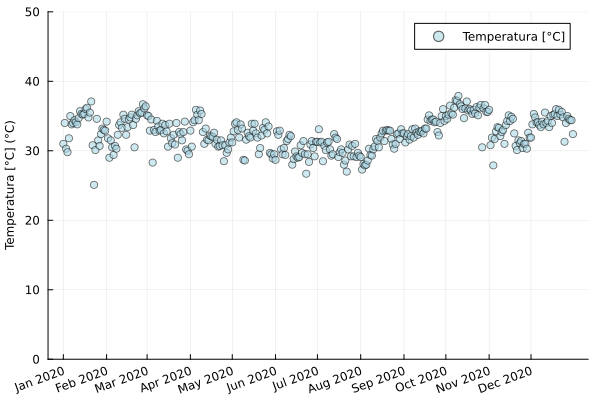

In [31]:
# Criando o gráfico com a escala de temperatura em Celsius
scatter(
    df.DT_MEDICAO, df.TEMP_MAX,
    label = "Temperatura [°C]",
    color = :lightblue, alpha = 0.6, xlabel = "", ylabel = "Temperatura [°C]", 
    legend = :topright,  # Adicionando a legenda
    legendfontsize = 8,  # Diminuindo o tamanho da fonte da legenda
    ylims = (0, 50),
    linewidth = 1.5,
    yticks = 0:10:50,  # Definindo ticks de 10 em 10 no eixo Y
    tickfontsize = 8,  # Diminuindo o tamanho da fonte dos ticks
    guidefontsize = 8,  # Diminuindo o tamanho das fontes dos rótulos
    xticks = (df.DT_MEDICAO[tick_positions], formatted_dates[tick_positions]),  # Ajustando os rótulos e suas posições
    xrotation = 20  # Rotacionando os rótulos do eixo X em 45 graus
)

In [34]:
df_2 = INMET.series(:A307, Date(2003,1,1), Date(2003,12,31))

Row,CD_ESTACAO,UF,VEL_VENTO_MED,DC_NOME,DT_MEDICAO,VL_LONGITUDE,VL_LATITUDE,TEMP_MIN,TEMP_MED,TEMP_MAX,UMID_MIN,UMID_MED,CHUVA
,String,String,String?,String,String,Quantity…,Quantity…,Quantity…?,Quantity…?,Quantity…?,Quantity…?,Quantity…?,Quantity…?
1,A307,PE,missing,PETROLINA,2003-01-01,-40.5233°,-9.38833°,missing,missing,missing,missing,missing,missing
2,A307,PE,missing,PETROLINA,2003-01-02,-40.5233°,-9.38833°,missing,missing,missing,missing,missing,missing
3,A307,PE,missing,PETROLINA,2003-01-03,-40.5233°,-9.38833°,missing,missing,missing,missing,missing,missing
4,A307,PE,missing,PETROLINA,2003-01-04,-40.5233°,-9.38833°,missing,missing,missing,missing,missing,missing
5,A307,PE,missing,PETROLINA,2003-01-05,-40.5233°,-9.38833°,missing,missing,missing,missing,missing,missing
6,A307,PE,missing,PETROLINA,2003-01-06,-40.5233°,-9.38833°,missing,missing,missing,missing,missing,missing
7,A307,PE,missing,PETROLINA,2003-01-07,-40.5233°,-9.38833°,missing,missing,missing,missing,missing,missing
8,A307,PE,missing,PETROLINA,2003-01-08,-40.5233°,-9.38833°,missing,missing,missing,missing,missing,missing
9,A307,PE,missing,PETROLINA,2003-01-09,-40.5233°,-9.38833°,missing,missing,missing,missing,missing,missing
